40  correct  setosa
41  correct  setosa
42  correct  setosa
43  correct  setosa
44  correct  setosa
45  correct  setosa
46  correct  setosa
47  correct  setosa
48  correct  setosa
49  correct  setosa
90  correct  versicolor
91  correct  versicolor
92  correct  versicolor
93  correct  versicolor
94  correct  versicolor
95  correct  versicolor
96  correct  versicolor
97  correct  versicolor
98  correct  versicolor
99  correct  versicolor
140  correct  virginica
141  correct  virginica
142  correct  virginica
143  correct  virginica
144  correct  virginica
145  correct  virginica
146  correct  virginica
147  correct  virginica
148  correct  virginica
149  correct  virginica
Accuracy of k =  1  is  100.0
40  correct  setosa
41  correct  setosa
42  correct  setosa
43  correct  setosa
44  correct  setosa
45  correct  setosa
46  correct  setosa
47  correct  setosa
48  correct  setosa
49  correct  setosa
90  correct  versicolor
91  correct  versicolor
92  correct  versicolor
93  correct  versi

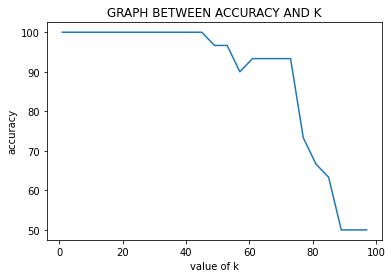

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math
#distributing the data
def distr(t1, t2, t3, data):
    for i in range(0, data['species'].count()):
        if data['species'].values[i] == 'setosa':
            t1.append(i)
        elif data['species'].values[i] == 'versicolor':
            t2.append(i)
        elif data['species'].values[i] == 'virginica':
            t3.append(i)
    return t1, t2, t3

#training the algo using training set. 1-40 data of each species will be used foor training purpose
def trainin(train, t1, t2, t3):
    id = int(len(t1) * 0.8)
    for i in range(0, id):
        train.append(t1[i])
    id = int(len(t2) * 0.8)
    for i in range(0, id):
        train.append(t2[i])
    id = int(len(t3) * 0.8)
    for i in range(0, id):
        train.append(t3[i])
    return train

#testing on 40-50 data of each species
def testing(test, t1, t2, t3):
    for i in range(int(len(t1) * 0.8), len(t1)):
        test.append(t1[i])
    for i in range(int(len(t2) * 0.8), len(t2)):
        test.append(t2[i])
    for i in range(int(len(t3) * 0.8), len(t3)):
        test.append(t3[i])
    return test


def algo(data, test, train, k):
    result = {}
    correct = 0

    for i in range(0, ts):
        sl = data['sepal_length'][test[i]]
        sw = data['sepal_width'][test[i]]
        pl = data['petal_length'][test[i]]
        pw = data['petal_width'][test[i]]
        for j in range(0, len(train)):
            sl2 = data['sepal_length'][train[j]] - sl
            sw2 = data['sepal_width'][train[j]] - sw
            pl2 = data['petal_length'][train[j]] - pl
            pw2 = data['petal_width'][train[j]] - pw
            ans = sl2 * sl2 + sw2 * sw2 + pl2 * pl2 + pw2 * pw2
            ans = math.sqrt(ans)
            result[ans] = data['species'][train[j]]
        c1 = 0
        c2 = 0
        c3 = 0
        count = 0

        for z in sorted(result):
            if (count == k): break
            if (result[z] == 'setosa'): c1 = c1 + 1
            if (result[z] == 'versicolor'): c2 = c2 + 1
            if (result[z] == 'virginica'): c3 = c3 + 1
            count = count + 1
        mx = max(c1, max(c2, c3))
        if (mx == c1):
            if (data['species'][test[i]] == "setosa"):
                print(test[i], " correct ", data['species'][test[i]])
                correct = correct + 1
            else:
                print(test[i], " not correct ", data['species'][test[i]])
        elif (mx == c2):
            if (data['species'][test[i]] == "versicolor"):
                print(test[i], " correct ", data['species'][test[i]])
                correct = correct + 1
            else:
                print(test[i], " not correct ", data['species'][test[i]])
        elif (mx == c3):
            if (data['species'][test[i]] == "virginica"):
                print(test[i], " correct ", data['species'][test[i]])
                correct = correct + 1
            else:
                print(test[i], " not correct ", data['species'][test[i]])
        result.clear()
    return correct


data = pd.read_csv("/content/knn.csv")
t1 = []
t2 = []
t3 = []
t1, t2, t3 = distr(t1, t2, t3, data)
test = []
train = []
train = trainin(train, t1, t2, t3)
test = testing(test, t1, t2, t3)
ts = len(test)
# print(tr,len(train))
val_k = []
acc = []
for k in range(1, 100, 4):
    correct = 0
    correct = algo(data, test, train, k)
    #print(len(test))
    per = correct / len(test) * 100
    print("Accuracy of k = ", k, " is ", per)
    val_k.append(k)
    acc.append(per)

plt.plot(val_k, acc)
plt.xlabel("value of k")
plt.ylabel("accuracy")
plt.title("GRAPH BETWEEN ACCURACY AND K")
plt.show()